## Breast Cancer Prediction Using Logistic Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = pd.read_csv('breast_cancer.csv')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sample code number            699 non-null    int64 
 1    Clump Thickness              699 non-null    int64 
 2    Uniformity of cell size      699 non-null    int64 
 3    Uniformity of cell shape     699 non-null    int64 
 4    Marginal Adhesion            699 non-null    int64 
 5    Single epithelial cell size  699 non-null    int64 
 6    Bare Nuclei                  699 non-null    object
 7    Bland Chromatin              699 non-null    int64 
 8    Normal Nucleoli              699 non-null    int64 
 9    Mitoses                      699 non-null    int64 
 10   Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [20]:
dataset = dataset[dataset[' Bare Nuclei'] != '?']

In [32]:
dataset[' Bare Nuclei'] = dataset[' Bare Nuclei'].astype(int)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Sample code number            683 non-null    int64
 1    Clump Thickness              683 non-null    int64
 2    Uniformity of cell size      683 non-null    int64
 3    Uniformity of cell shape     683 non-null    int64
 4    Marginal Adhesion            683 non-null    int64
 5    Single epithelial cell size  683 non-null    int64
 6    Bare Nuclei                  683 non-null    int32
 7    Bland Chromatin              683 non-null    int64
 8    Normal Nucleoli              683 non-null    int64
 9    Mitoses                      683 non-null    int64
 10   Class                        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


In [22]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting the test set results

In [25]:
y_pred = classifier.predict(X_test)

### Making confusion matrix

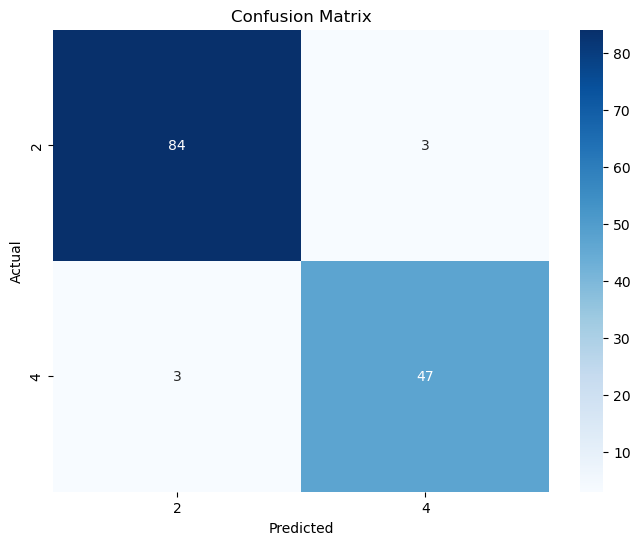

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[2, 4])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['2', '4'], yticklabels=['2', '4'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Accuracy with K-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %


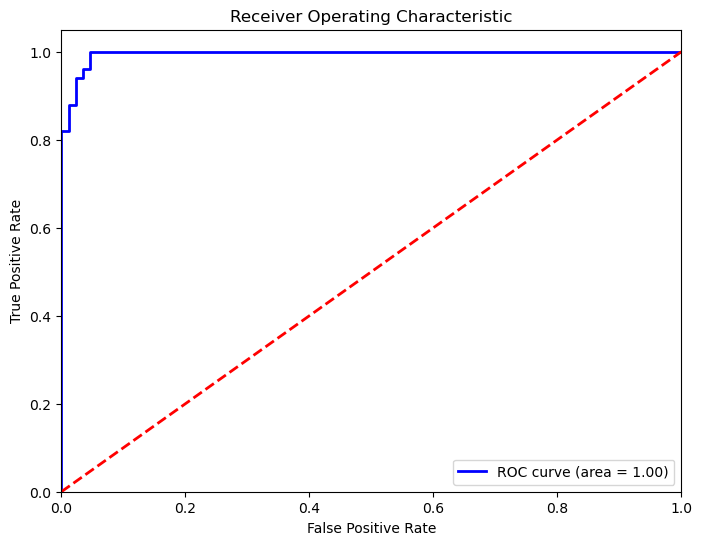

In [28]:
from sklearn.metrics import roc_curve, auc
y_binary = [1 if label == 4 else 0 for label in y_test] 
y_scores = classifier.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_binary, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


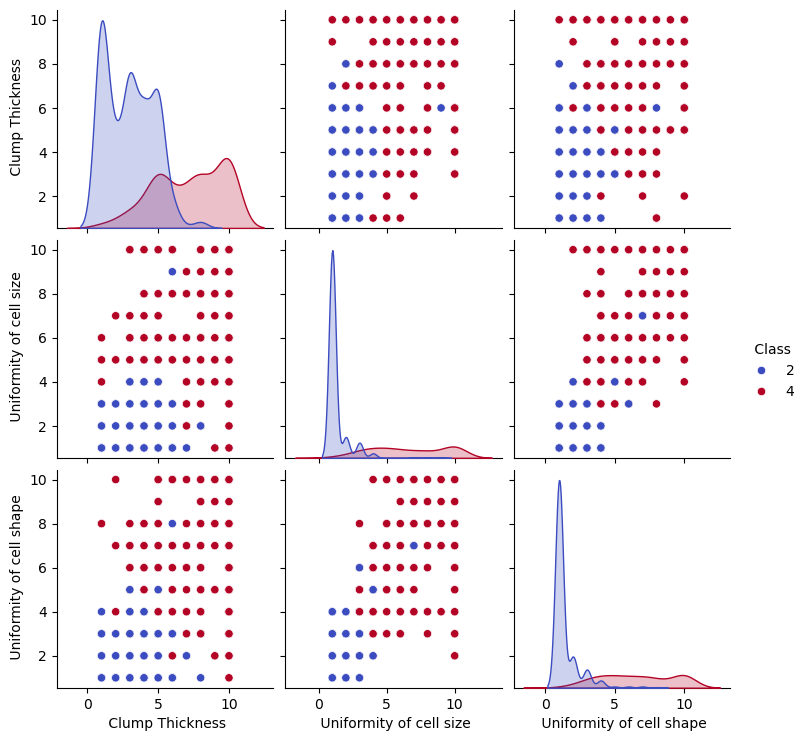

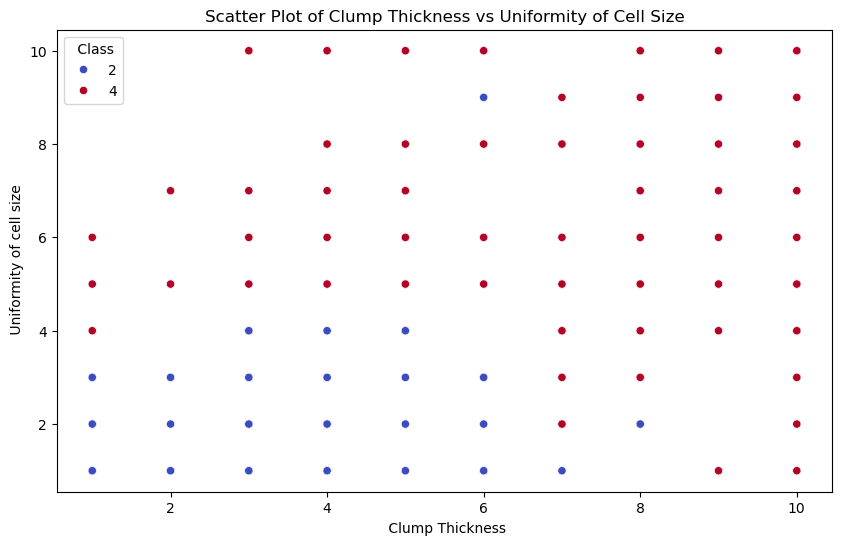

In [29]:
sns.pairplot(dataset, hue=' Class', vars=[' Clump Thickness', ' Uniformity of cell size', ' Uniformity of cell shape'], palette='coolwarm')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Clump Thickness', y=' Uniformity of cell size', hue=' Class', data=dataset, palette='coolwarm')
plt.title('Scatter Plot of Clump Thickness vs Uniformity of Cell Size')
plt.show()
